In [2]:
from matplotlib import pyplot as plt
import xarray as xr
from uwnet.stochastic_parameterization.utils import get_dataset
from uwnet.thermo import integrate_q2
from uwnet.stochastic_parameterization.graph_utils import loghist

ds_run = xr.open_dataset('/Users/stewart/Desktop/stochastic_out_3d.nc')
dir_ = '/Users/stewart/projects/uwnet/uwnet/stochastic_parameterization/'
base_model_location = dir_ + 'full_model/1.pkl'
ds_location = dir_ + 'training.nc'
ds_true = get_dataset(t_start=0, t_stop=80, ds_location=ds_location, base_model_location=base_model_location)

ds_run = ds_run.isel(y=range(28, 36))
ds_true = ds_true.isel(y=range(28, 36))


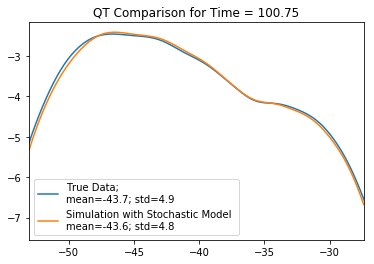

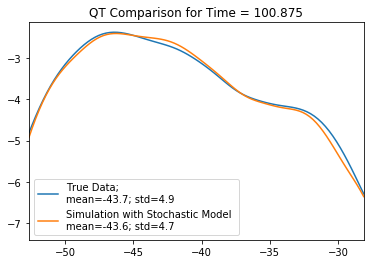

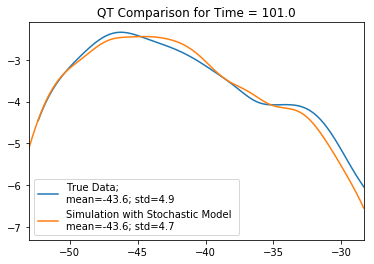

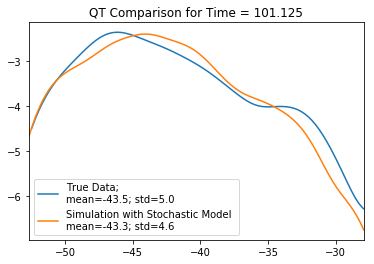

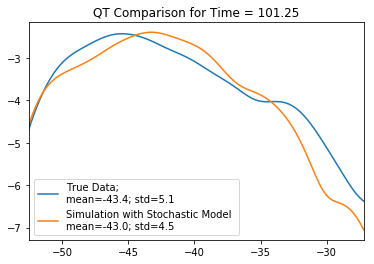

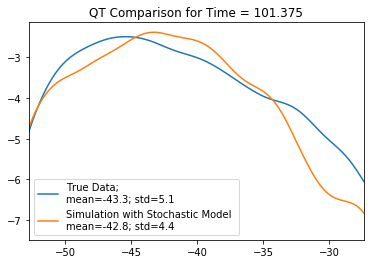

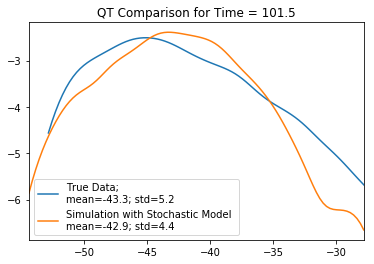

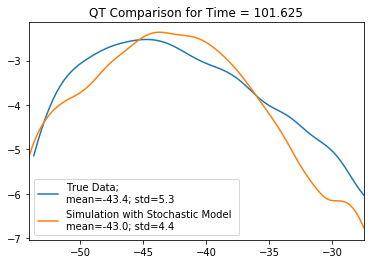

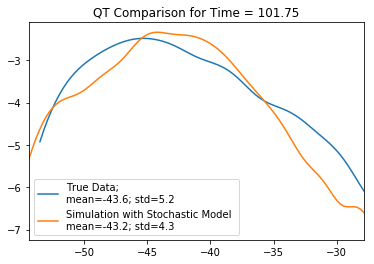

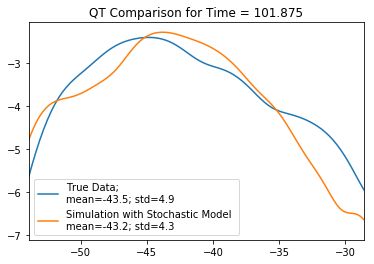

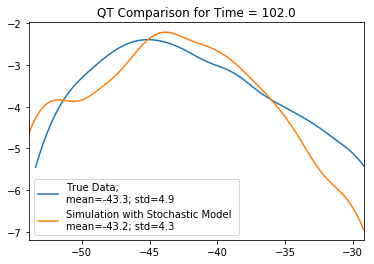

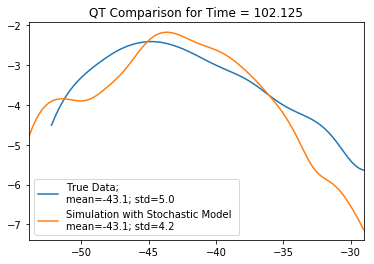

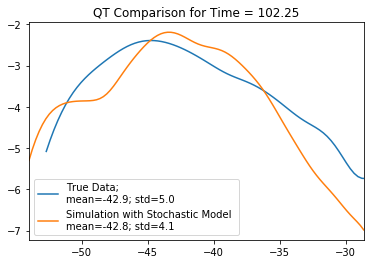

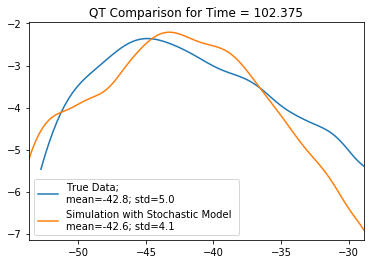

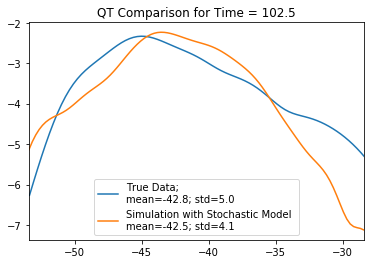

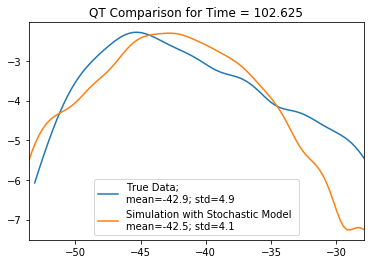

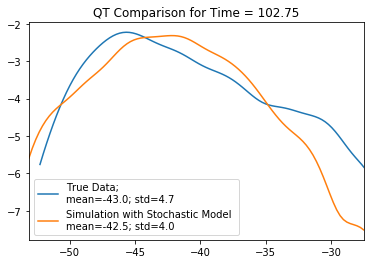

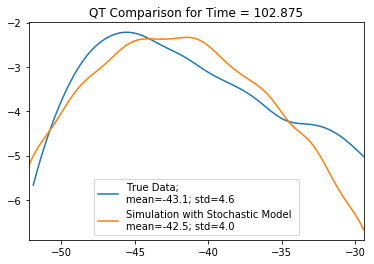

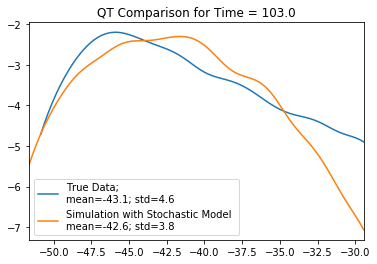

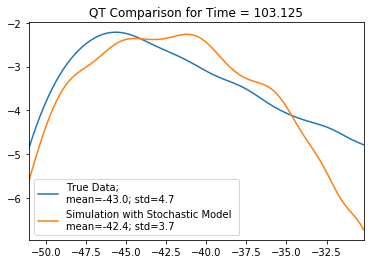

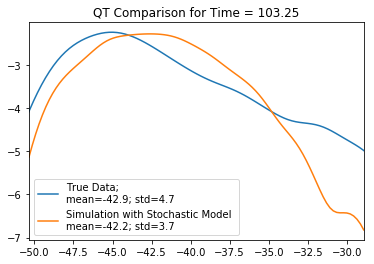

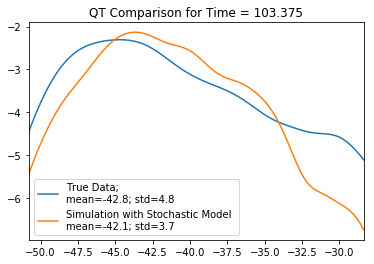

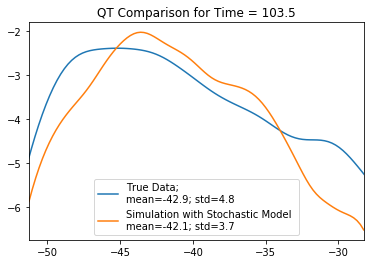

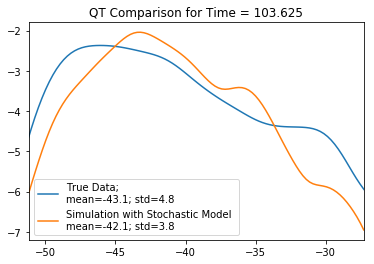

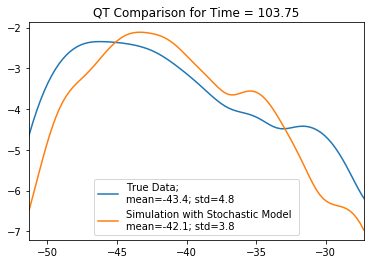

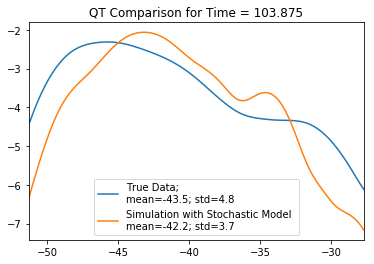

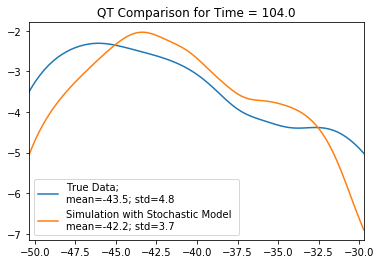

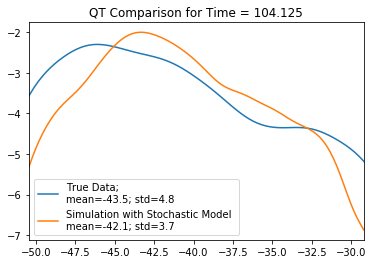

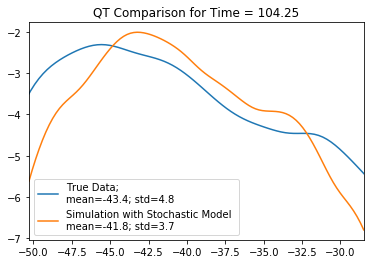

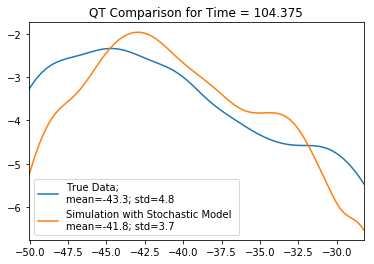

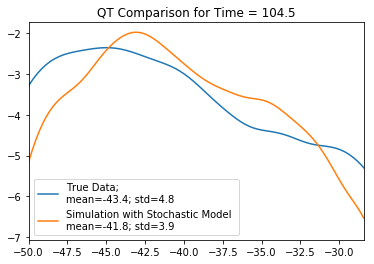

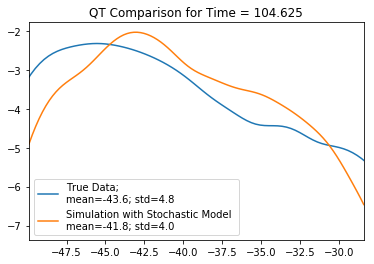

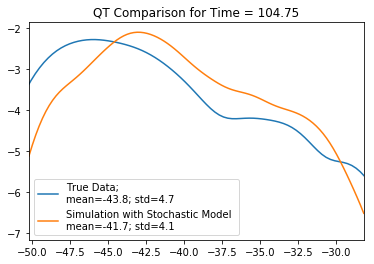

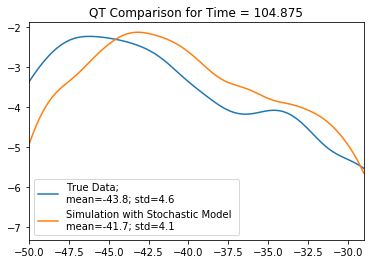

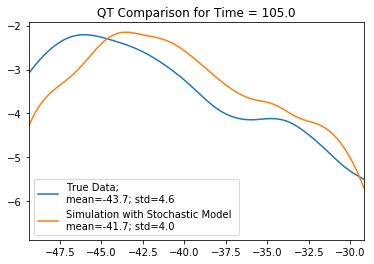

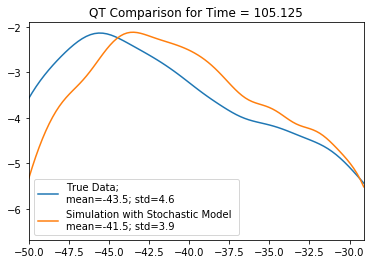

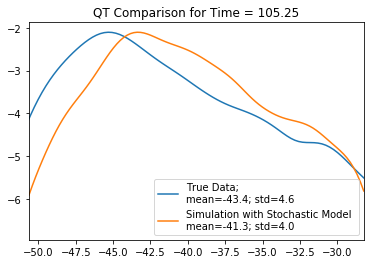

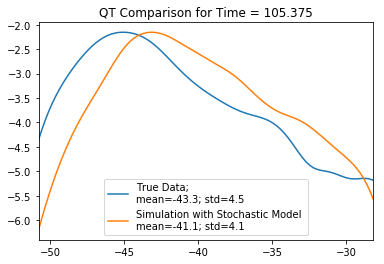

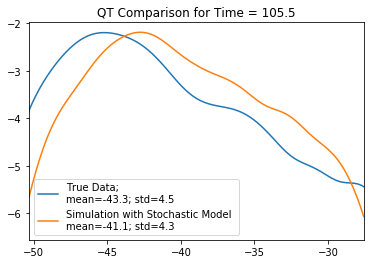

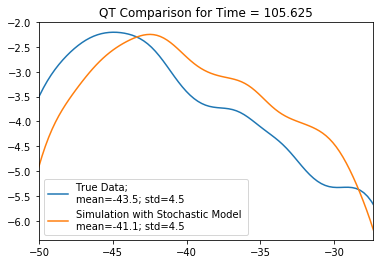

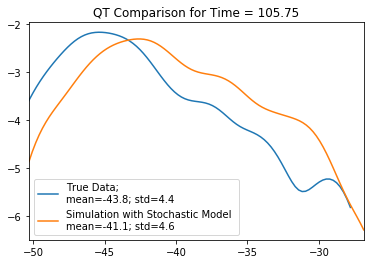

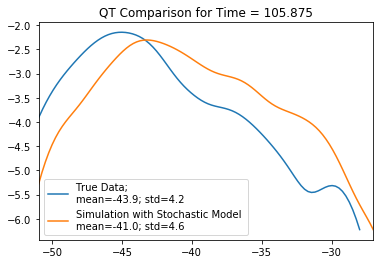

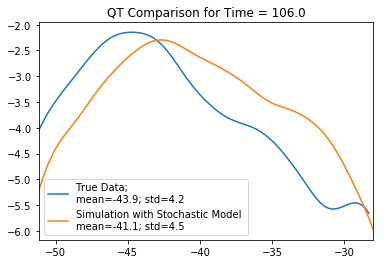

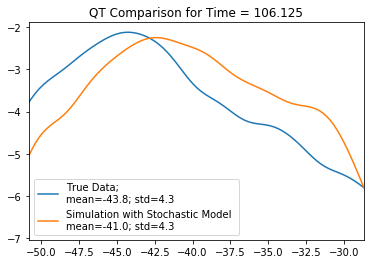

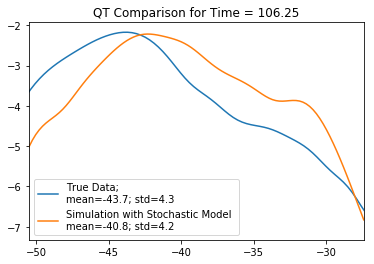

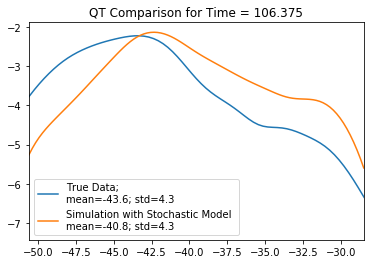

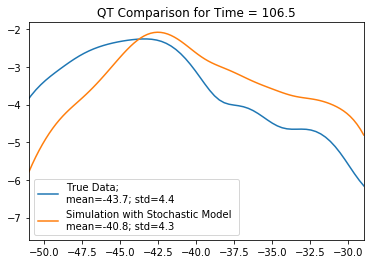

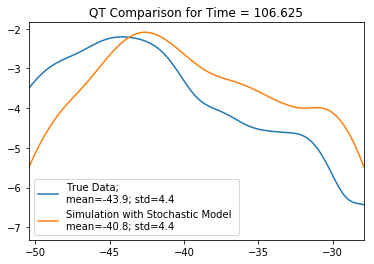

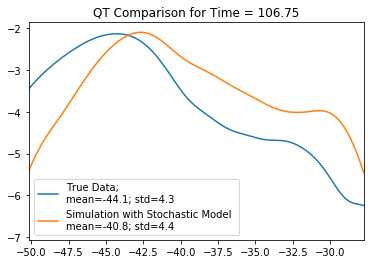

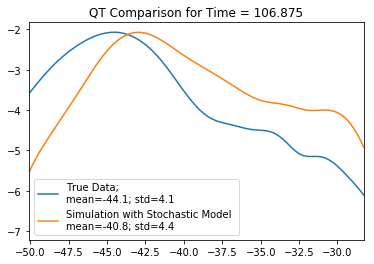

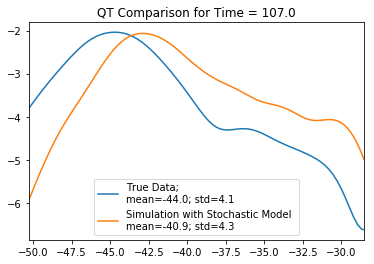

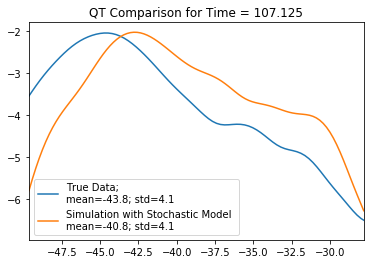

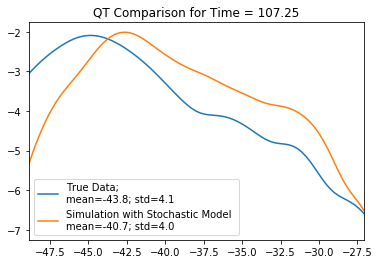

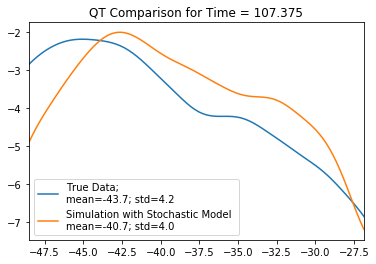

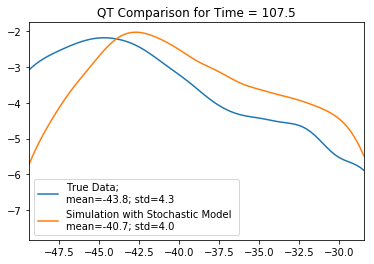

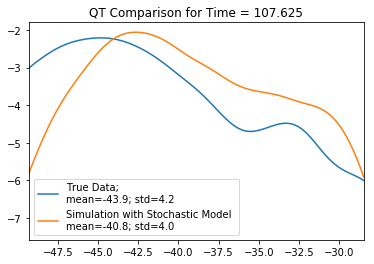

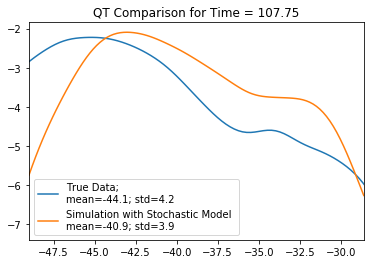

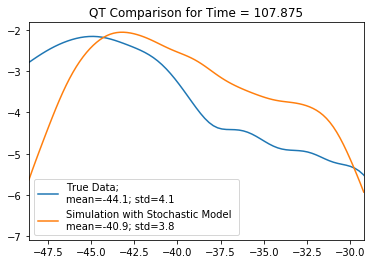

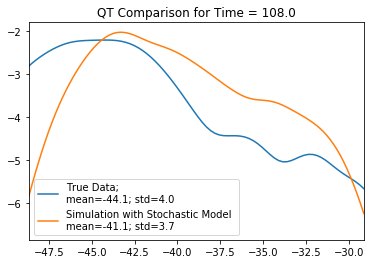

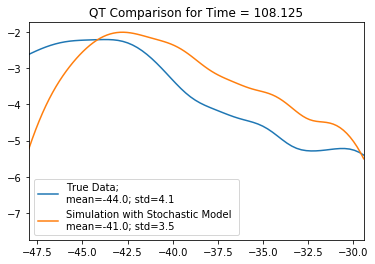

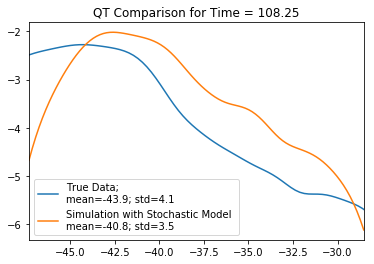

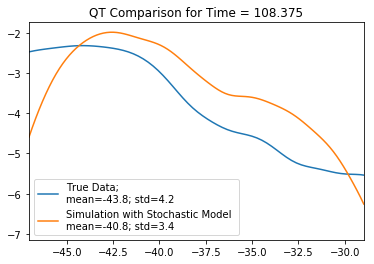

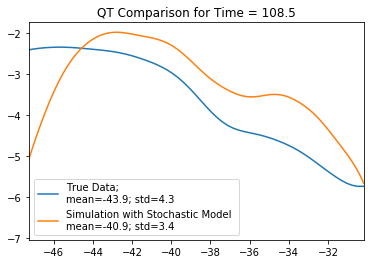

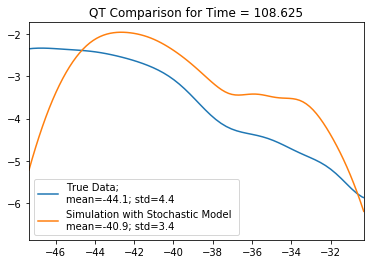

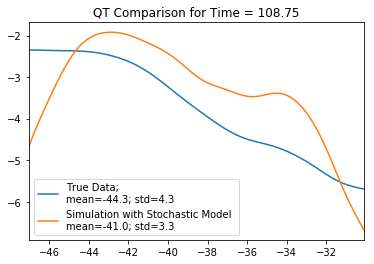

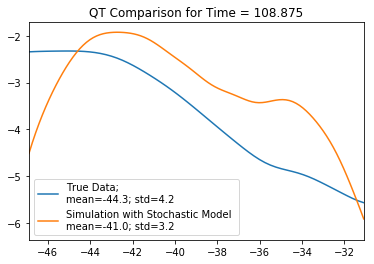

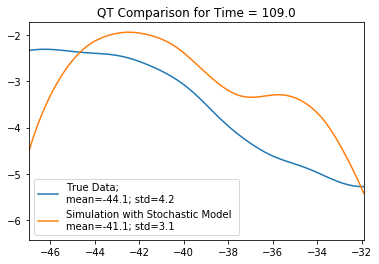

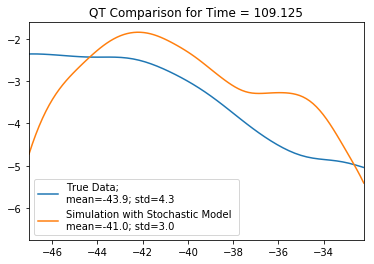

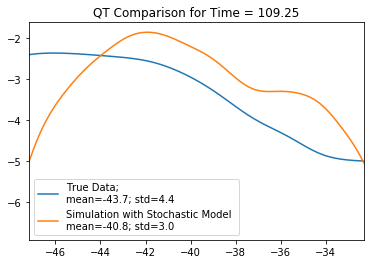

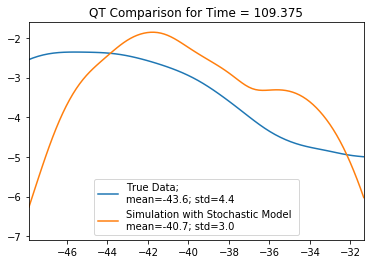

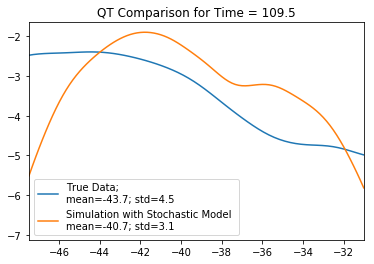

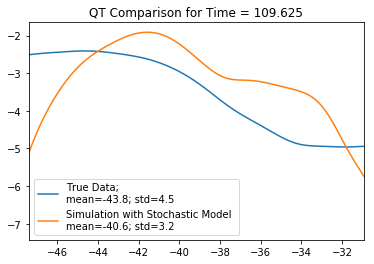

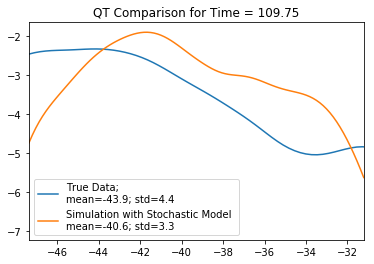

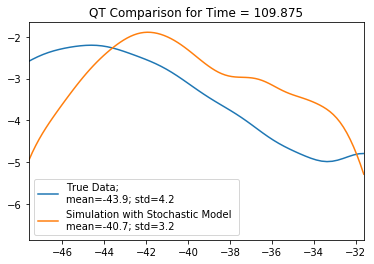

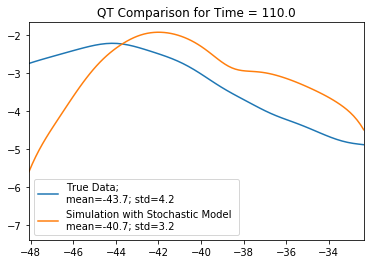

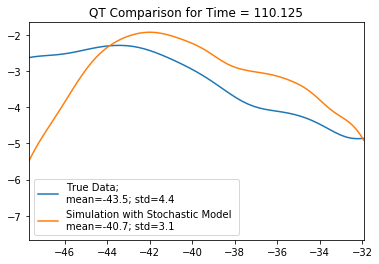

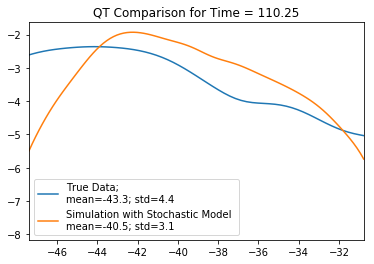

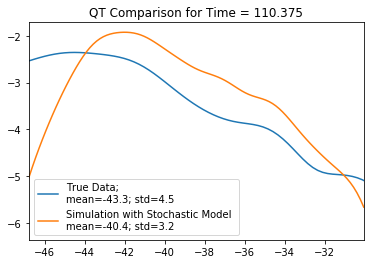

In [10]:
%matplotlib inline
for time_idx in range(1, min(len(ds_run.time), len(ds_true.time))):
    fig, ax = plt.subplots()
    ds_true_values = -integrate_q2(ds_true.isel(time=time_idx).QT, ds_true.layer_mass).values.ravel()
    ds_run_values = -integrate_q2(ds_run.isel(time=time_idx).QT, ds_true.layer_mass).values.ravel()
    loghist(
        -integrate_q2(
            ds_true.isel(time=time_idx).QT, ds_true.layer_mass).values.ravel(),
        ax=ax,
        upper_percentile=99.99,
        lower_percentile=0.01,
        label=f'True Data; \nmean={round(ds_true_values.mean(), 1)}; std={round(ds_true_values.std(), 1)}',
        gaussian_comparison=False
    )
    loghist(
        ds_run_values,
        ax=ax,
        upper_percentile=99.99,
        lower_percentile=0.01,
        label=f'Simulation with Stochastic Model \nmean={round(ds_run_values.mean(), 1)}; std={round(ds_run_values.std(), 1)}',
        gaussian_comparison=False
    )
    plt.legend()
    plt.title(f'QT Comparison for Time = {ds_run.time[time_idx].values}')
    plt.show()
